In [1]:
import pandas as pd
import dateutil
pd.set_option('display.max_rows', 1000)

1. type	订单时效	0实时，1预约 
2. combo_type	订单类型	1包车，4拼车
3. traffic_type	交通类型	1企业时租，2企业接机套餐，3企业送机套餐，4拼车，5接机，6送机，302跨城拼车
4. product_1level	一级业务线	1专车，3快车，9豪华车

In [2]:
def analysis_disorder_count(data):
    """
    返回向量 day, dayofweek, hour, latency
    """
    day = data[0].day
    dayofweek = data[0].dayofweek
    
    t = data.to_frame()
    t['hour'] = t['t2'].apply(lambda x: x.hour)
    
    # 返回一个小时内的乱序个数
    def hour_disorder(hour):
        MAX = pd.Timestamp("1997/10/17")
        count = 0
        for h in hour:
            if h >= MAX:
                MAX = h
            else:
                count += 1
        if len(hour) == 0:
            return count, 0
        return count, count/len(hour)
        
    vec = dict(hour=[], day=[], dayofweek=[])
    res = dict(res=[])
    hour_count = dict(c=[])
    for i in range(24):
        hour = t[t['hour']==i]
        hour_count['c'].append(len(hour))
        c, num = hour_disorder(hour['t2'])
        res['res'].append(num)
        vec['hour'].append(i)
        vec['day'].append(day)
#         vec['quarter'].append(quarter)
        vec['dayofweek'].append(dayofweek)
    return pd.DataFrame(vec), pd.DataFrame(res), pd.DataFrame(hour_count)

In [3]:
def clean_data(file_name):
    f = open(file_name)
    lines = f.readlines()
    data_dict = {
        "idx": [],
        "type": [],
        "product_id": [],
        "pre_total_fee": [],
        "combo_type": [],
        "traffic_type": [],
        "county": [],
        "t1": [],
        "t2": [],
        "product_1level": []
    }
    for line in lines[1:]:
        d = line.replace('\n', '').split('\t')
        data_dict['idx'].append(int(d[0]))
        data_dict['type'].append(int(d[5]))
        data_dict['product_id'].append(int(d[1]))
        data_dict['pre_total_fee'].append(d[13])
        data_dict['combo_type'].append(int(d[6]))
        data_dict['traffic_type'].append(int(d[7]))
        data_dict['county'].append(d[4])
        data_dict['t1'].append(d[11])
        data_dict['t2'].append(d[12])
        data_dict['product_1level'].append(int(d[16]))
    data = pd.DataFrame(data_dict)
    data = data[data['t1']!="0000-00-00 00:00:00"]
    cd = data.sort_values(by=['t1'])
    cd_real = cd[cd['type']==0]
    res = cd_real[cd_real['product_1level']==3]
    res = res[res['county']=="460107"]
    res.to_csv('cd.csv')
#     return res

In [4]:
file_name = "dwv_order_make_haikou_8.txt"
clean_data(file_name)

In [5]:
test = pd.read_csv('cd.csv')
test_ts = test['t2'].apply(lambda x: dateutil.parser.parse(x))
vec, res, c = analysis_disorder_count(test_ts)

In [6]:
import matplotlib.pyplot as plt

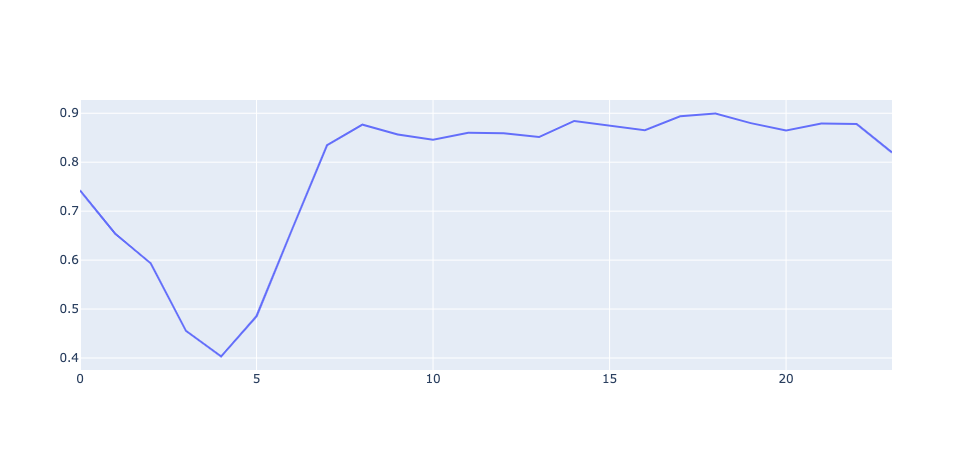

In [86]:
import plotly.graph_objects as go
line1 = go.Scatter(x=c.index,y=c['c'],name="source")
line2 = go.Scatter(x=c.index,y=res['res'],name="dis")
fig = go.Figure([line2])
fig.show()

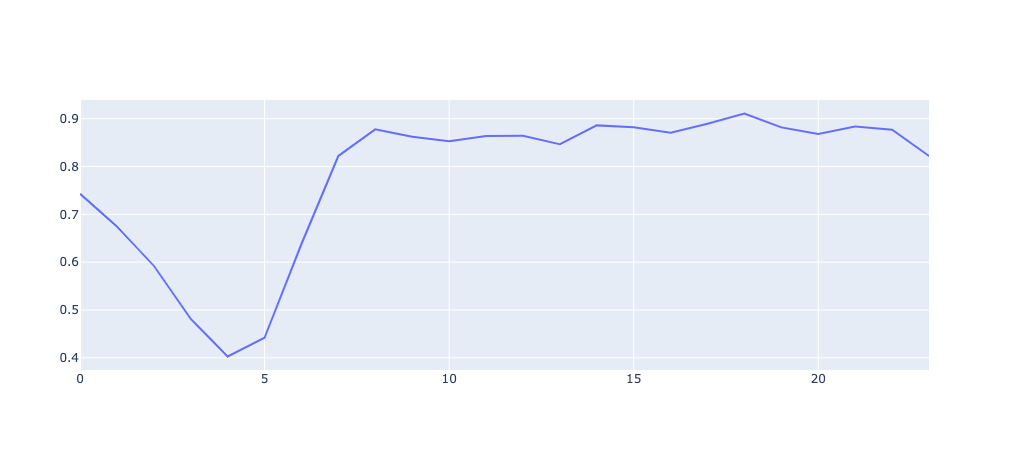

In [83]:
import plotly.graph_objects as go
line1 = go.Scatter(x=c.index,y=c['c'],name="source")
line2 = go.Scatter(x=c.index,y=res['res'],name="dis")
fig = go.Figure([line2])
fig.show()

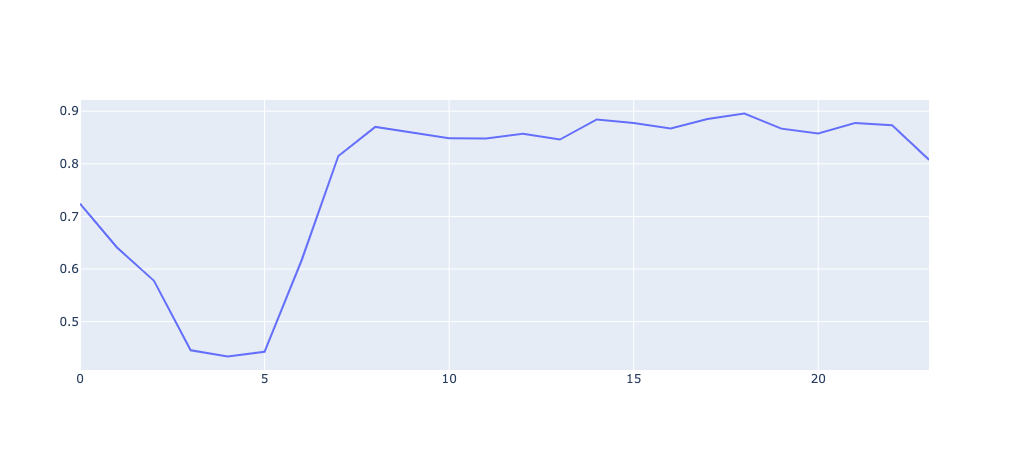

In [80]:
import plotly.graph_objects as go
line1 = go.Scatter(x=c.index,y=c['c'],name="source")
line2 = go.Scatter(x=c.index,y=res['res'],name="dis")
fig = go.Figure([line2])
fig.show()

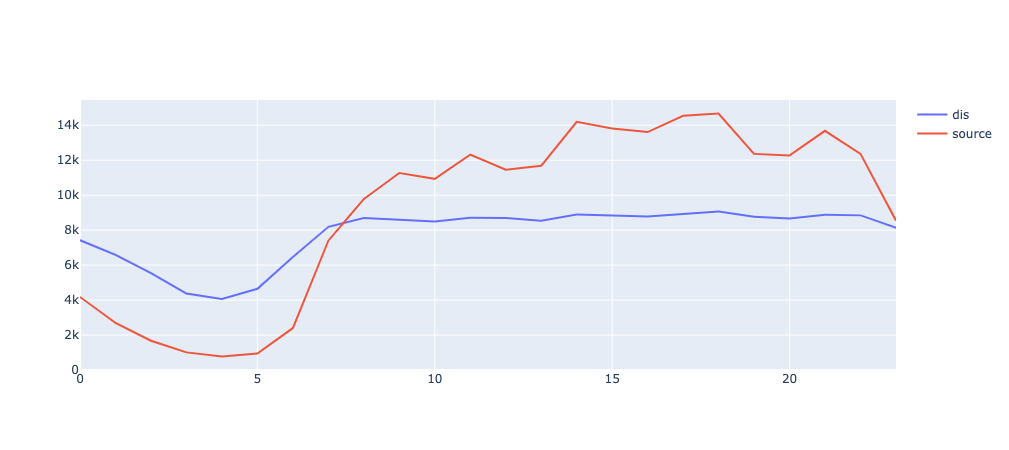

In [76]:
import plotly.graph_objects as go
line1 = go.Scatter(x=c.index,y=c['c'],name="source")
line2 = go.Scatter(x=c.index,y=res['res']*10000,name="dis")
fig = go.Figure([line2, line1])
fig.show()

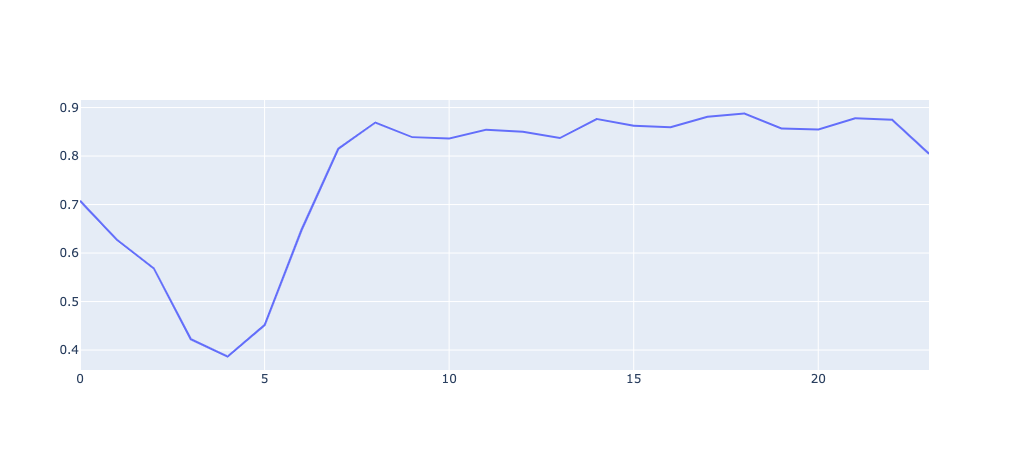

In [68]:
import plotly.graph_objects as go
line1 = go.Scatter(x=c.index,y=c['c'],name="source")
line2 = go.Scatter(x=c.index,y=res['res'],name="dis")
fig = go.Figure([line2])
fig.show()

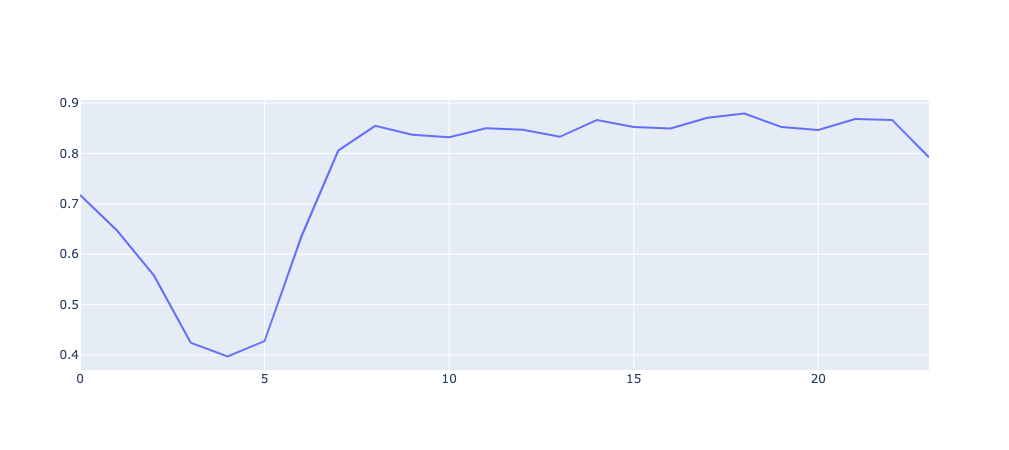

In [65]:
import plotly.graph_objects as go
line1 = go.Scatter(x=c.index,y=c['c'],name="source")
line2 = go.Scatter(x=c.index,y=res['res'],name="dis")
fig = go.Figure([line2])
fig.show()

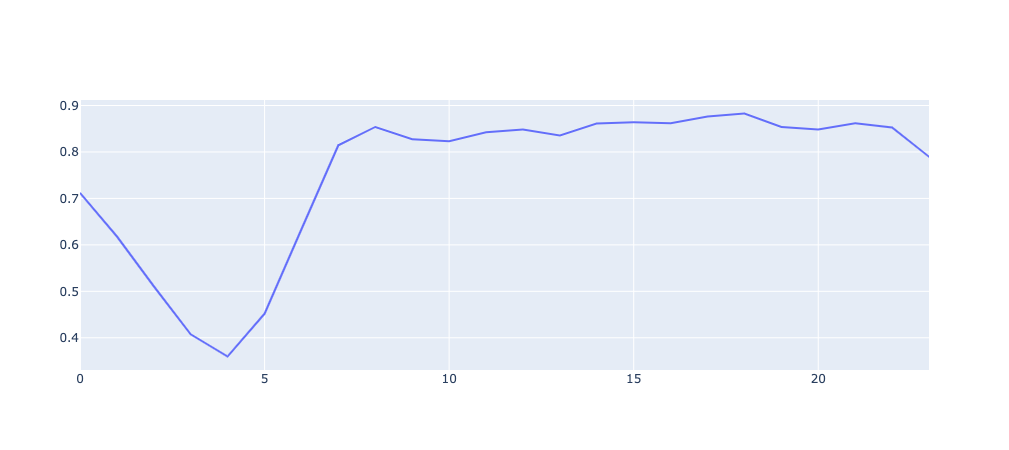

In [62]:
import plotly.graph_objects as go
line1 = go.Scatter(x=c.index,y=c['c'],name="source")
line2 = go.Scatter(x=c.index,y=res['res'],name="dis")
fig = go.Figure([line2])
fig.show()

In [8]:
res = clean_data(file_name)

In [10]:
res['county'].value_counts()

460106    541271
460108    383589
460107    234124
460105    148161
469021        60
Name: county, dtype: int64

In [11]:
res = clean_data("dwv_order_make_haikou_2.txt")

In [12]:
res['county'].value_counts()

460106    522386
460108    376262
460107    225304
460105    150988
469021       109
0              1
Name: county, dtype: int64

In [30]:
res = clean_data("dwv_order_make_haikou_3.txt")
res['county'].value_counts()

460106    565327
460108    396262
460107    243710
460105    163149
469021       106
Name: county, dtype: int64

In [31]:
res = clean_data("dwv_order_make_haikou_4.txt")
res['county'].value_counts()

460106    558666
460108    381602
460107    245721
460105    161668
469021        92
469005         1
Name: county, dtype: int64

In [32]:
res = clean_data("dwv_order_make_haikou_5.txt")
res['county'].value_counts()

460106    611811
460108    414585
460107    262929
460105    179057
469021       192
0              2
Name: county, dtype: int64

In [33]:
res = clean_data("dwv_order_make_haikou_6.txt")
res['county'].value_counts()

460106    658832
460108    447958
460107    287688
460105    194677
469021       148
Name: county, dtype: int64

In [34]:
res = clean_data("dwv_order_make_haikou_6.txt")
res['county'].value_counts()

460106    658832
460108    447958
460107    287688
460105    194677
469021       148
Name: county, dtype: int64

In [41]:
res = clean_data("dwv_order_make_haikou_7.txt")
res['county'].value_counts()

460106    625974
460108    439306
460107    272972
460105    185492
469021       170
Name: county, dtype: int64

In [18]:
file_name = "dwv_order_make_haikou_8.txt"

In [19]:
clean_data(file_name)